# Atividade 5 de sistemas dinâmicos

*Danilo Lessa Bernardineli (danilo.bernardineli@usp.br)*

In [9]:
%load_ext autotime

In [10]:
# Dependences
from scipy.integrate import solve_ivp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

time: 700 µs


## Exercício 1 - atrator de Rossler

### Fig 9.7

In [11]:
def rossler(t, X, a, b, c):
    (x, y, z) = X
    dx = -(y + z)
    dy = x + a * y
    dz = b + z * (x - c)
    return (dx, dy, dz)

time: 811 µs


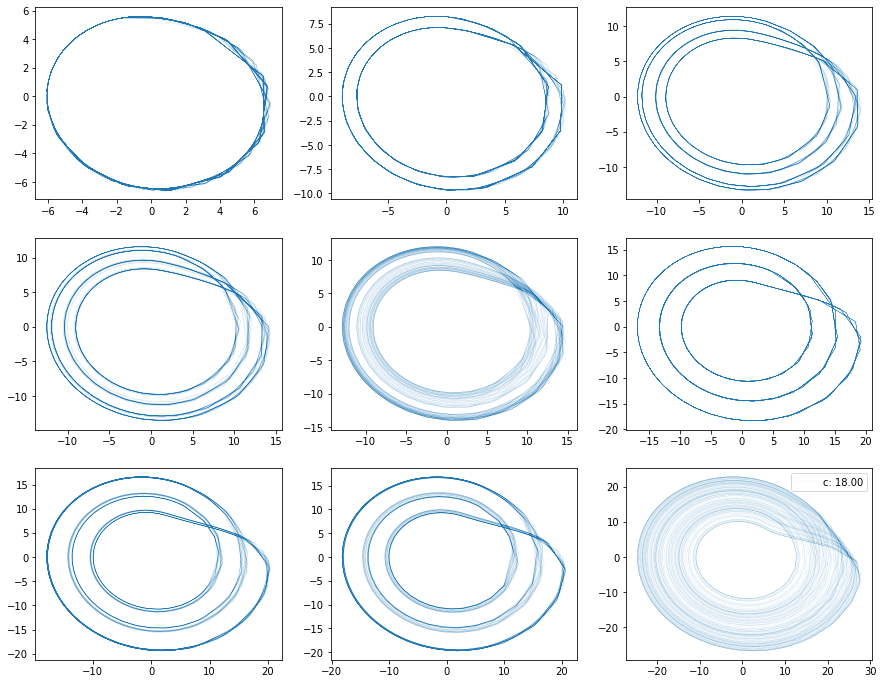

time: 8.58 s


In [12]:
(a, b) = (0.1, 0.1)
T = (0, 1000)
X_0 = (0, 0, 0)
c_list = [4, 6, 8.5, 8.7, 9.0, 12, 12.8, 13.0, 18.0]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, c in enumerate(c_list):
    f = solve_ivp(rossler, T, X_0, args=(a, b, c))
    (x, y, z) = f.y[:, 1000:]
    axes.ravel()[i].plot(x, y, '.-', linewidth=0.05, markersize=0.01, label=f"c: {c :.2f}")
plt.legend()
plt.show()

### Fig 9.8

In [4]:
(a, b) = (0.1, 0.1)
T = (0, 10)

N = 10
X_0 = np.random.rand(N, 3) * 50
c_list = np.linspace(30, 46, 100)

bifurcation = {}
for c in tqdm(c_list):
    solve_rossler = lambda x_0: solve_ivp(rossler, T, x_0, args=(a, b, c))
    F = np.apply_along_axis(solve_rossler, 1, X_0)
    X = [f.y[0][-1] for f in F]
    bifurcation[c] = X

Widget Javascript not detected.  It may not be installed or enabled properly.


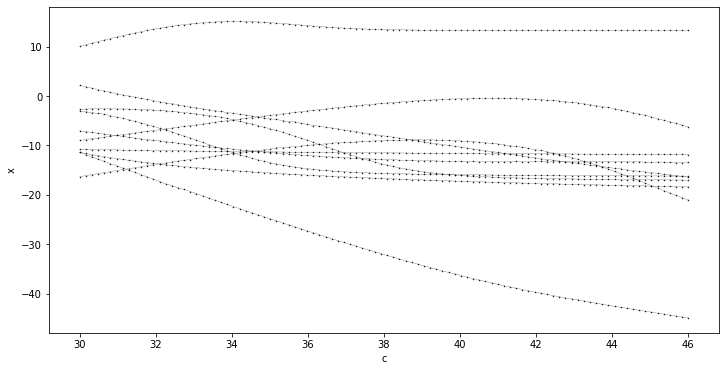

time: 284 ms


In [13]:
x, y = zip(*bifurcation.items())
plt.figure(figsize=(12, 6))
plt.plot(x, y, '.-', color='k', linewidth=0.2, markersize=1.0)
plt.ylabel("x")
plt.xlabel("c")
plt.show()

### Exercicio 2

### Exercicio 3

In [14]:
def three_wave(t, A, eta):
    pass

time: 728 µs


### Exercicio 4 - modelo de neurônio

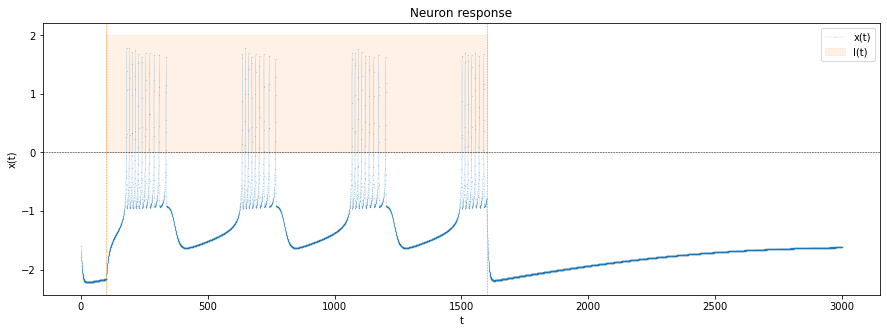

time: 6.96 s


In [15]:
def I(t, I_0, t_0, dt):
    """
    Current impulse function
    """
    if t > t_0:
        if t < t_0 + dt:
            return I_0
    return 0


def neuron(t, X, a, b, c, d, r, s, I_0, t_0, dt, x_1):
    """
    Neuron model
    """
    (x, y, z) = X
    dx = y - a * x ** 3 + b * x ** 2 + I(t, I_0, t_0, dt) - z
    dy = c - d * x ** 2 - y
    dz = r * (s * (x - x_1) - z)
    return (dx, dy, dz)

# Parameters
T = (0, 3000)
N = 10000
(x_1, y_1, z_1) = (-1.6, -11, 2.2)
(a, b, c, d) = (1, 3, 1, 5)
(r, s) = (0.001, 4.0)
(I_0, t_0, dt) = (2.0, 100, 1500)

# Setup
t_eval = np.linspace(T[0], T[1], N)
neuron_args = (a, b, c, d, r, s, I_0, t_0, dt, x_1)
neuron_X0 = (x_1, y_1, z_1)

# Solve
f = solve_ivp(neuron, T, neuron_X0,
              args=neuron_args)

# Prepare
t = f.t
(x, y, z) = f.y
x_I = np.linspace(t_0, t_0 + dt, 5)
y_I = [I_0] * len(x_I)

# Plot visualization
plt.figure(figsize=(15, 5))
plt.title("Neuron response")
plt.plot(t, x, '.-', linewidth=0.1, markersize=0.2, label='x(t)')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.fill_between(x_I, 0, y_I, color='C1', alpha=0.1, label='I(t)')
plt.axvline(t_0, color='C1', linestyle='--', linewidth=0.5)
plt.axvline(t_0 + dt, color='C1', linestyle='--', linewidth=0.5)
plt.axhline(0, linestyle='--', linewidth=0.5, color='k')
plt.legend()
plt.fill
plt.show()

### Exercicio 5 - SEIR

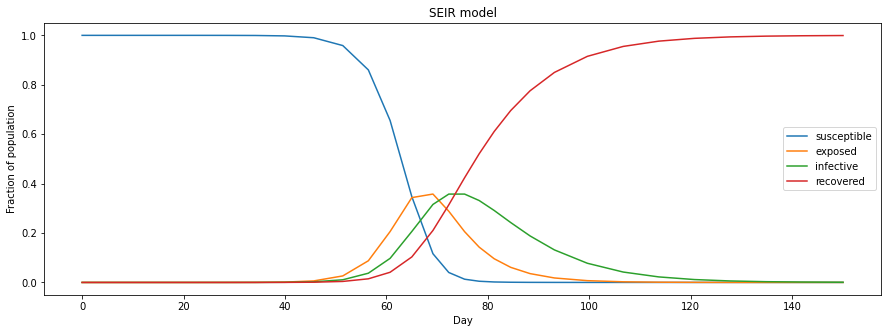

time: 357 ms


In [16]:
def SEIR(t, X, beta, omega, gamma):
    (S, E, I, R) = X
    N = S + E + I + R
    new_exposed = beta * S * I / N
    new_infected = omega * E
    new_recovered = gamma * I
    dS = -1 * new_exposed
    dE = new_exposed - new_infected
    dI = new_infected - new_recovered
    dR = new_recovered
    return (dS, dE, dI, dR)

SEIR_T = (0, 150)
(beta_0, k, T_e, T_i) = (0.1, 10.0, 7.0, 10.25)
N_0 = 1e7

(S_0, E_0, I_0, R_0) = (N_0 - 1, 1, 0, 0)
SEIR_X0 = (S_0, E_0, I_0, R_0)
(beta, omega, gamma) = (beta_0 * k, 1 / T_e, 1 / T_i)
SEIR_args = (beta, omega, gamma)

f = solve_ivp(SEIR, SEIR_T, SEIR_X0,
              args=SEIR_args)

t = f.t
(s, e, i, r) = f.y
n = s + e + i + r
plt.figure(figsize=(15, 5))
plt.title("SEIR model")
plt.plot(t, s / n, label='susceptible')
plt.plot(t, e / n, label='exposed')
plt.plot(t, i / n, label='infective')
plt.plot(t, r / n, label='recovered')
plt.ylabel("Fraction of population")
plt.xlabel("Day")
plt.legend()
plt.show()